## Import Libs

In [14]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [15]:

DATASET_DIR = '../../datasets/face-musk-data'
CATEGORIES = []
for c in os.listdir(DATASET_DIR):
    CATEGORIES.append(c)

CATEGORIES.remove('.DS_Store')
print(CATEGORIES)


['with_mask', 'without_mask']


In [16]:
# defining train test valid split
TRAIN_TEST_VALID_SPLIT = [0.7, 0.2, 0.1]
IMG_SIZE = 227
def train_test_valid_split(X , y, split):
    train_size = int(split[0] * len(X))
    test_size = int(split[1] * len(X))
    valid_size = int(split[2] * len(X))
    X_train, X_test, X_valid = X[:train_size], X[train_size:train_size+test_size], X[train_size+test_size:train_size+test_size+valid_size]
    y_train, y_test, y_valid = y[:train_size], y[train_size:train_size+test_size], y[train_size+test_size:train_size+test_size+valid_size]

    print("Train size: ", len(X_train), len(y_train))
    print("Test size: ", len(X_test), len(y_test))
    print("Valid size: ", len(X_valid), len(y_valid))

    return X_train, X_test, X_valid, y_train, y_test, y_valid





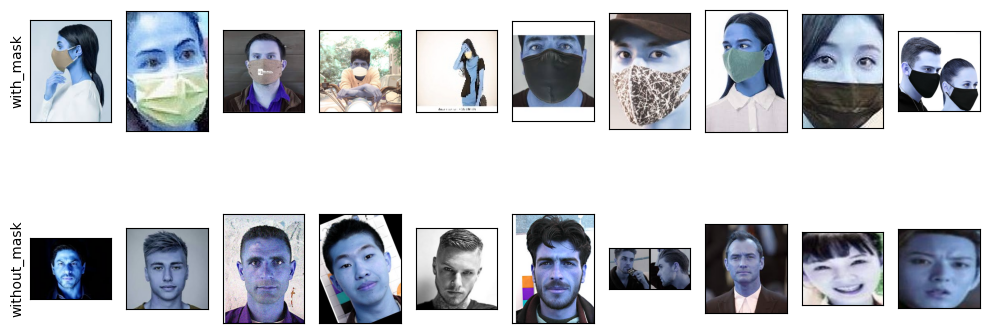

In [17]:
plt.figure(figsize=(10,5))
i=0
for c in CATEGORIES:  
    path = os.path.join(DATASET_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [18]:
datasets = []

for c in CATEGORIES:
    path = os.path.join(DATASET_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            datasets.append({
                'image': img_resized,
                'label': class_num
            }) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(datasets))

100%|██████████| 3828/3828 [00:03<00:00, 1102.56it/s]

7553


In [19]:
random.shuffle(datasets)

X = [i['image'] for i in datasets]
y = [i['label'] for i in datasets]

X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_valid_split(X, y, TRAIN_TEST_VALID_SPLIT )


Train size:  5287 5287
Test size:  1510 1510
Valid size:  755 755


X_train= (5287, 227, 227, 3) Y_train= (5287,)


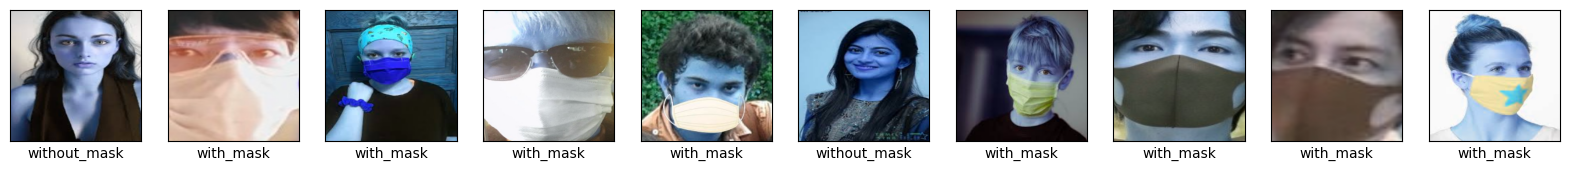

In [20]:

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)
# show some images with labels
plt.figure(figsize=(20,10))
i=0
for img, label in zip(X_train[:20], y_train[:20]):
    plt.subplot(2,10,i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(CATEGORIES[label])
    i += 1
    if i%10 == 0:
        break

print(f"X_train= {X_train.shape} Y_train= {y_train.shape}")


X_test= (1510, 227, 227, 3) Y_test= (1510,)


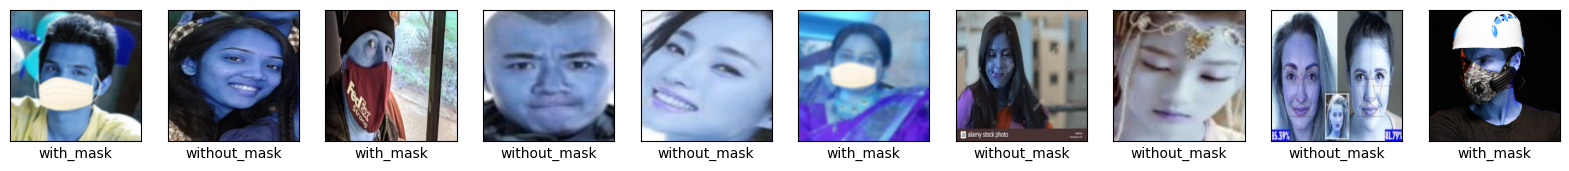

In [21]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

# show some images with labels
plt.figure(figsize=(20,10))
i=0
for img, label in zip(X_test[:20], y_test[:20]):
    plt.subplot(2,10,i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(CATEGORIES[label])
    i += 1
    if i%10 == 0:
        break

print(f"X_test= {X_test.shape} Y_test= {y_test.shape}")

X_test= (755, 227, 227, 3) Y_test= (755,)


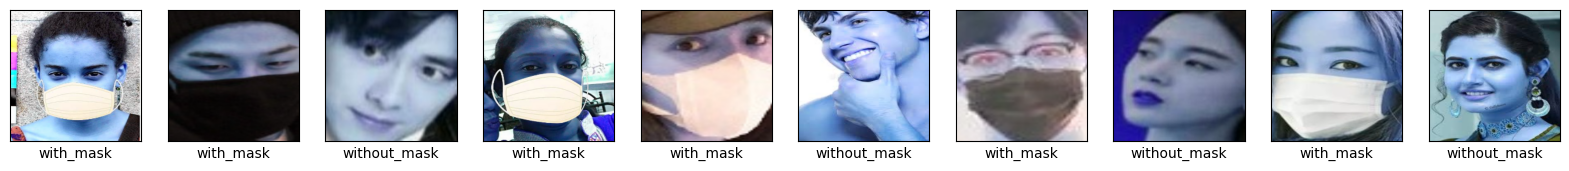

In [22]:
X_valid = np.array(X_valid).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_valid = np.array(y_valid)

# show some images with labels
plt.figure(figsize=(20,10))
i=0
for img, label in zip(X_valid[:20], y_valid[:20]):
    plt.subplot(2,10,i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(CATEGORIES[label])
    i += 1
    if i%10 == 0:
        break

print(f"X_test= {X_valid.shape} Y_test= {y_valid.shape}")

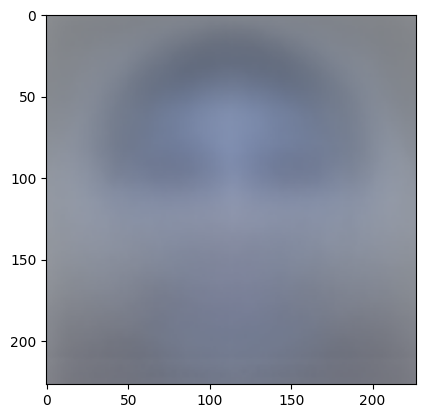

In [23]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [24]:
X_train_norm, X_valid_norm,  X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img


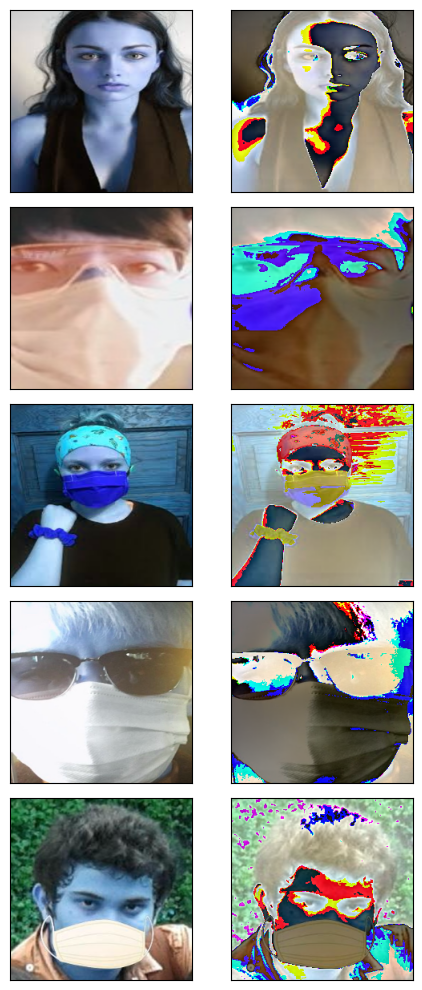

In [25]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [26]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Create model


In [27]:
Size = 128
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-03 17:08:52.278595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-03 17:08:52.286864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [28]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Start Training

In [29]:
h = model.fit(x=X_train_norm, y=y_train, epochs=10, validation_data=(X_valid_norm, y_valid), batch_size=32)


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)
model.save('face-musk-model.h5')
